# Рекуррентные нейронные сети

# Векторизация слов

In [1]:
# N-граммы (комбинации из N последовательных терминов)
from sklearn.feature_extraction.text import CountVectorizer

print("Модель для N-грамм от 1 до 1 слова")  # bag of words
vect = CountVectorizer(ngram_range=(1, 1)) 
res = vect.fit_transform(['он не делает работу', 'не он делает работу']).toarray()
print(res)
print(vect.vocabulary_)

print()
print("Модель для N-грамм от 1 до 2 слов")
vect = CountVectorizer(ngram_range=(1, 2)) 
res = vect.fit_transform(['он не делает работу', 'не он делает работу']).toarray()
print(res)
print(vect.vocabulary_)

Модель для N-грамм от 1 до 1 слова
[[1 1 1 1]
 [1 1 1 1]]
{'он': 2, 'не': 1, 'делает': 0, 'работу': 3}

Модель для N-грамм от 1 до 2 слов
[[1 1 1 1 0 1 0 1 1]
 [1 1 1 0 1 1 1 0 1]]
{'он': 5, 'не': 2, 'делает': 0, 'работу': 8, 'он не': 7, 'не делает': 3, 'делает работу': 1, 'не он': 4, 'он делает': 6}


### Word2Vec
![alt text](https://miro.medium.com/max/1014/1*dm9dudL37B6JG8saeR3zIw.png "W2V")

In [11]:
import codecs
import numpy as np
import gensim

In [79]:
with codecs.open('data/LOTR.txt', encoding='utf-8', mode='r') as f:
    docs = f.readlines()
    
max_sentence_len = 12

sentences = [sent for doc in docs for sent in doc.split('.')]
sentences = [[word for word in sent.lower().split()[:max_sentence_len]] for sent in sentences]
print(len(sentences), 'предложений')

13598 предожений


In [45]:
# Обучение модели
word_model = gensim.models.Word2Vec(sentences, size=100, min_count=1, window=5, iter=100)

In [47]:
pretrained_weights = word_model.wv.syn0
vocab_size, embedding_size = pretrained_weights.shape
print(vocab_size, embedding_size)

24681 100


In [52]:
print('Похожие слова:')
for word in ['хоббит', 'кольцо', 'гном', 'эльф', 'лук']:
    most_similar = ', '.join('%s (%.2f)' % (similar, dist) for similar, dist in word_model.wv.most_similar(word)[:8])
    print('  %s -> %s' % (word, most_similar))


Похожие слова:
  хоббит -> горлума? (0.67), гондорец (0.65), бильбо, (0.59), маг (0.58), бродяжник, (0.58), сэм, (0.57), спутникам, (0.57), гимли (0.57)
  кольцо -> другое (0.57), недостает, (0.56), оно (0.54), всевластья (0.51), представляется (0.50), воинство (0.50), кольцо, (0.48), кольцу (0.48)
  гном -> гимли (0.73), гондорец (0.70), ошеломленный (0.69), бирюк (0.69), маг, (0.67), боромир (0.66), дарина! (0.65), горислав (0.65)
  эльф -> хэлдар (0.78), гондорец (0.74), по-эльфийски, (0.72), «гэндальф! (0.71), носом (0.71), мордора! (0.70), коню (0.70), отворить, (0.69)
  лук -> лихолесского (0.94), лориэнский (0.94), эльфа! (0.94), дожевав (0.93), благословен (0.88), упруг (0.86), хопкин-бобкин, (0.82), элендил, (0.81)


In [51]:
# Получение вектора
word_model.wv.word_vec('хоббит')

array([ 1.4920405 ,  0.3855237 , -2.1392462 ,  1.6713449 ,  2.076249  ,
        0.24096918, -1.0232087 ,  1.6717471 , -0.9787734 , -1.2110564 ,
       -0.24157877,  1.3178241 , -0.6365279 , -0.9205003 ,  2.100536  ,
        0.12447252,  1.1303604 , -0.37761056, -1.9567635 , -1.042313  ,
       -1.0693281 ,  0.39517692,  0.09959457,  0.07394334, -0.0322785 ,
        0.96153355, -0.93003166, -0.5966073 ,  1.4453518 ,  0.21228427,
       -0.86422783,  0.29630557, -0.50275165,  0.43376654, -0.16708575,
       -2.0124283 ,  1.6950493 ,  2.5790198 ,  0.7920905 ,  2.0803225 ,
        0.92059624,  0.1692214 ,  1.438246  ,  1.093751  , -0.629431  ,
        1.5013747 ,  0.35440475, -0.99809   , -0.29649833, -1.0948515 ,
        1.8772261 ,  0.48367494, -0.17703338, -0.5097192 ,  1.6049448 ,
        1.8505365 ,  1.9792376 ,  0.00394805,  1.443503  ,  0.5531206 ,
        0.27404526,  0.6261111 ,  1.5988548 , -0.5643878 , -0.6396273 ,
       -0.70211333,  0.21090426,  0.881619  ,  1.3347114 , -0.81

In [82]:
vec = word_model.wv.word_vec('гном') - word_model.wv.word_vec('хоббит')
word_model.wv.similar_by_vector(vec)

[('сопротивление,', 0.4040951132774353),
 ('отчаянное', 0.40066424012184143),
 ('свернул;', 0.3840741515159607),
 ('ляжет', 0.375370591878891),
 ('попадались', 0.3720041513442993),
 ('оборвалось', 0.36449873447418213),
 ('новая', 0.3572019040584564),
 ('договорились,', 0.3403235673904419),
 ('обращаясь', 0.33938926458358765),
 ('здоровье»', 0.3366469144821167)]

# RNN
Рекуррентные нейронные сети (RNN) — вид нейронных сетей, где связи между элементами образуют направленную последовательность. Благодаря этому появляется возможность обрабатывать серии событий во времени или последовательные пространственные цепочки. В отличие от многослойных перцептронов, рекуррентные сети могут использовать свою внутреннюю память для обработки последовательностей произвольной длины. Поэтому сети RNN применимы в таких задачах, где нечто целостное разбито на части, например: распознавание рукописного текста или распознавание речи. 
<img src="https://habrastorage.org/web/5c8/0fa/c22/5c80fac224d449209d888d18ea1111a8.png" alt="RNN">

## Внутреннее устройство простых RNN
Входной вектор и вектор внутренней памяти объединяются и отправляются на полносвязный слой с функцией активации *tanh*
<img src="https://habrastorage.org/web/47d/ee6/2c3/47dee62c3af8498c946befa1f3330d90.png"  alt="RNN In"  height=70% width=70%>

$$h_t = tanh(w * [h_{t-1}; x_t])$$

## Виды RNN
<img src="images/II5/rnns.jpg"  alt="RNN In"  height=70% width=70%>

### Many to many (Генерация текста)
<img src="images/II5/rnn_m2m.jpeg"  alt="RNN In"  height=50% width=50%>

### One to many (Подпись изображений)
<img src="images/II5/rnn_o2m.png"  alt="RNN In"  height=70% width=70%>
Началом и концом предложения являются специальные слова: $<start>$ $<end>$

# LSTM
Долгая краткосрочная память (Long short-term memory; LSTM) – особая разновидность архитектуры рекуррентных нейронных сетей, способная к обучению долговременным зависимостям.
<img src="https://habrastorage.org/web/67b/04f/73b/67b04f73b4c34ba38edfa207e09de07c.png" alt="LSTM">
* «вентиль забывания» контролирует меру сохранения значения в памяти
* «входной вентиль» контролирует меру вхождения нового значения в память
* «выходной вентиль» контролирует меру того, в какой степени значение, находящееся в памяти, используется при расчёте выходной функции активации для блока

### «Вентиль забывания»
<img src="https://habrastorage.org/web/a5f/31a/104/a5f31a104b184217aca105de9ab6d320.png">

### «Входной вентиль»
<img src="https://habrastorage.org/web/248/bf4/a75/248bf4a75ab74bf180b9c0e2e2cc5a58.png">

### «Выходной вентиль»
<img src="https://habrastorage.org/web/16d/5b5/783/16d5b5783ba34244afcf0f240133fb28.png">

# GRU
Управляемые рекуррентные блоки (Gated Recurrent Units, GRU) — механизм вентилей для рекуррентных нейронных сетей, представленный в 2014 году. Было установлено, что его эффективность при решении задач моделирования музыкальных и речевых сигналов сопоставима с использованием долгой краткосрочной памяти (LSTM). По сравнению с LSTM у данного механизма меньше параметров, т.к. отсутствует выходной вентиль.
<img src="https://www.data-blogger.com/wp-content/uploads/2017/08/gru.png" alt="GRU">

# Архитектуры LSTM
### Объединение нескольких RNN
<img src="images/II5/rnn_arch.png"  height=50% width=50%>

### Двунаправленные
<img src="images/II5/rnn_bi.jpg"  height=70% width=70%>

### Seq2Seq
<img src="images/II5/seq2seq.png"  height=70% width=70%>

### Архитектура Google’s Neural Machine Translation
<img src="images/II5/rnn_ggle.png"  height=100% width=100%>

# Механизм внимания (Attention)
<img src="images/II5/rnn_att.png"  height=30% width=30%>


<img src="images/II5/att1.jpeg"  height=90% width=90%>
<img src="images/II5/att2.jpeg"  height=90% width=90%>

### Результат
<img src="images/II5/map_att.png"  height=70% width=70%>

# Пример

In [84]:
import pandas as pd
from keras.layers import Dense, LSTM, Input
from keras.models import Model

df = pd.read_csv('./data/production.csv')
df.head()

,API,Year,Month,Liquid,Gas,RatioGasOil,Water,PercentWater,DaysOn,_LastUpdate
0,5005072170100,2014,11,9783,11470,1.172442,10558,1.079219,14,2016-04-06 17:20:05.757
1,5005072170100,2014,12,24206,26476,1.093778,5719,0.236264,31,2016-04-06 17:20:05.757
2,5005072170100,2015,1,20449,26381,1.290088,2196,0.107389,31,2016-04-06 17:20:05.757
3,5005072170100,2015,2,6820,10390,1.523460,583,0.085484,28,2016-04-06 17:20:05.757
4,5005072170100,2015,3,7349,7005,0.953191,122,0.016601,13,2016-06-16 14:07:33.203


In [97]:
# Подготовка данных по добыче
liquid = df.groupby('API')['Liquid'].apply(lambda df_: df_.reset_index(drop=True))
liquid.head()

API             
5005072170100  0     9783
               1    24206
               2    20449
               3     6820
               4     7349
Name: Liquid, dtype: int64

In [98]:
df_prod = liquid.unstack()
df_prod.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
API,,,,,,,,,,,,,,,,,,,,,
5005072170100,9783,24206,20449,6820,7349,16552,13844,10655,6135,11105,...,6547,5117,5280,4762,4962,4478,4328,4777,3849,3835
5123377130000,2341,4689,3056,1979,2037,2260,1961,1549,1364,1380,...,898,787,880,879,773,737,543,732,559,633
5123379280000,6326,6405,6839,6584,4775,3917,3840,3031,3137,2669,...,1795,1852,1734,1588,1739,1473,1472,1378,1235,1331
5123379400000,8644,13977,9325,6445,5326,4538,3403,2534,2685,2597,...,1537,1331,1305,1510,1476,1729,1606,1388,1632,814
5123385820100,1753,4402,1187,1204,1176,1523,1169,782,634,597,...,60,0,0,0,0,0,236,830,6,571


In [108]:
# Масштабирование и деление на трейн/тест
data = df_prod.values
data = data / data.max()
data = data[:, :, np.newaxis]

data_tr = data[:40]
data_tst = data[40:]
print(data_tr.shape, data_tst.shape)

(40, 24, 1) (10, 24, 1)


In [109]:
x_data = [data_tr[:, i:i+12] for i in range(11)]
y_data = [data_tr[:, i+1:i+13] for i in range(11)]

x_data = np.concatenate(x_data, axis=0)
y_data = np.concatenate(y_data, axis=0)
print(x_data.shape, y_data.shape)

(440, 12, 1) (440, 12, 1)


In [124]:
timesteps = 12
inp = Input(shape=(timesteps, 1))
lstm = LSTM(units=32, return_sequences=True)(inp)
lstm = LSTM(units=32, return_sequences=True)(lstm)
out = Dense(1, activation="relu")(lstm)

model = Model(inp, out)
model.summary()
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 12, 1)             0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 12, 32)            4352      
_________________________________________________________________
lstm_10 (LSTM)               (None, 12, 32)            8320      
_________________________________________________________________
dense_5 (Dense)              (None, 12, 1)             33        
Total params: 12,705
Trainable params: 12,705
Non-trainable params: 0
_________________________________________________________________


In [125]:
model.fit(x_data, y_data, epochs=20)

Epoch 1/20
440/440 [==============================] - 3s 6ms/step - loss: 0.0120 - mean_absolute_error: 0.0732
Epoch 2/20
440/440 [==============================] - 0s 453us/step - loss: 0.0086 - mean_absolute_error: 0.0574
Epoch 3/20
440/440 [==============================] - 0s 462us/step - loss: 0.0071 - mean_absolute_error: 0.0492
Epoch 4/20
440/440 [==============================] - 0s 453us/step - loss: 0.0062 - mean_absolute_error: 0.0457
Epoch 5/20
440/440 [==============================] - 0s 450us/step - loss: 0.0057 - mean_absolute_error: 0.0454
Epoch 6/20
440/440 [==============================] - 0s 457us/step - loss: 0.0053 - mean_absolute_error: 0.0430
Epoch 7/20
440/440 [==============================] - 0s 439us/step - loss: 0.0050 - mean_absolute_error: 0.0412
Epoch 8/20
440/440 [==============================] - 0s 448us/step - loss: 0.0048 - mean_absolute_error: 0.0395
Epoch 9/20
440/440 [==============================] - 0s 448us/step - loss: 0.0045 - mean_absolute

In [143]:
# Предскажем на год вперёд используя данные только первого года
x_tst = data_tst[:, :12]
predicts = np.zeros((x_tst.shape[0], 0, x_tst.shape[2]))

for i in range(12):
    x = np.concatenate((x_tst[:, i:], predicts), axis=1)
    pred = model.predict(x)
    last_pred = pred[:, -1:]  # Нас интересует только последний месяц
    predicts = np.concatenate((predicts, last_pred), axis=1)

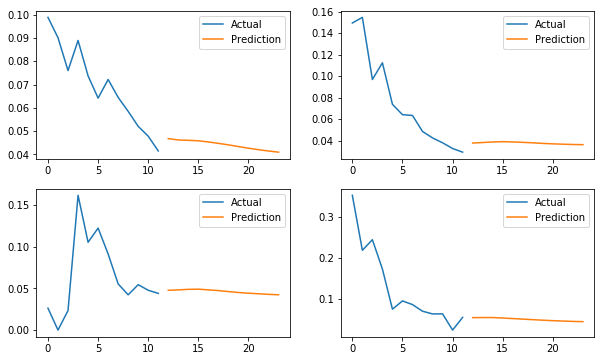

In [157]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for iapi in range(4):
    plt.subplot(2, 2, iapi+1)
    plt.plot(np.arange(x_tst.shape[1]), x_tst[iapi, :, 0], label='Actual')
    plt.plot(np.arange(predicts.shape[1])+x_tst.shape[1], predicts[iapi, :, 0], label='Prediction')
    plt.legend()
plt.show()

# Задание
1. Подготовьте данные для word2vec по одной из недавно прочитанных книг, удалив все символы, кроме букв и пробелов и обучите модель. Посмотрите результат.
2. Для обучения на нефтяных скважин добавьте во входные данные информацию со столбцов Gas, Water (т.е. размер x_data будет (440, 12, 3)) и обучите новую модель. Выход содержит Liquid, Gas и Water (для дальнейшего предсказания). Графики с результатами только для Liquid.
3. Из этого же текста возьмите небольшой фрагмент, разбейте на предложения с одинаковым числом символов. Каждый символ предложения закодируйте с помощью one hot encoding. В итоге у вас должен получиться массив размера (n_sentences, sentence_len, encoding_size).
4. На полученных в п.3 задании обучение модель RNN для предсказания следующего символа. Посмотрите результат при последовательной генерации.
5. \* (не обязательное) На полученных в п.1 задании обучение модель RNN для предсказания следующего слова. Посмотрите результат при последовательной генерации.